# Week 2

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

### Clustering coefficient

Measures the degree to which nodes in a network tendo to 'cluster' or form triangles

###### # Example 1

In [ ]:
g = nx.Graph()

In [ ]:
e = list(zip('A A A B B C C D E E F T'.split(), 'K B C C K E F E F H G J'.split()))

In [ ]:
g.add_edges_from(e)

In [ ]:
g.edges()

EdgeView([('A', 'K'), ('A', 'B'), ('A', 'C'), ('K', 'B'), ('B', 'C'), ('C', 'E'), ('C', 'F'), ('E', 'D'), ('E', 'F'), ('E', 'H'), ('F', 'G'), ('T', 'J')])

In [ ]:
g.degree('A')

3

In [ ]:
# getting various graph properties
print("Total number of nodes: ", int(g.number_of_nodes()))
print("Total number of edges: ", int(g.number_of_edges()))
print("List of all nodes: ", list(g.nodes()))
print("List of all edges: ", list(g.edges(data = True)))
print("Degree for all nodes: ", dict(g.degree()))

number_of_triangles = sum(nx.triangles(g).values()) / 3
print(number_of_triangles)
# 3 number of closed triads
# 22 number of open triads

Total number of nodes:  11
Total number of edges:  12
List of all nodes:  ['A', 'K', 'B', 'C', 'E', 'F', 'D', 'H', 'G', 'T', 'J']
List of all edges:  [('A', 'K', {}), ('A', 'B', {}), ('A', 'C', {}), ('K', 'B', {}), ('B', 'C', {}), ('C', 'E', {}), ('C', 'F', {}), ('E', 'D', {}), ('E', 'F', {}), ('E', 'H', {}), ('F', 'G', {}), ('T', 'J', {})]
Degree for all nodes:  {'A': 3, 'K': 2, 'B': 3, 'C': 4, 'E': 4, 'F': 3, 'D': 1, 'H': 1, 'G': 1, 'T': 1, 'J': 1}
3.0


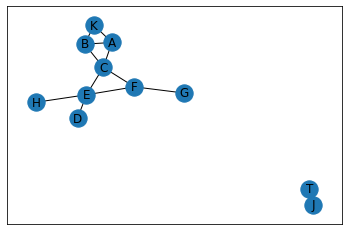

In [ ]:
nx.draw_networkx(g)

In [ ]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

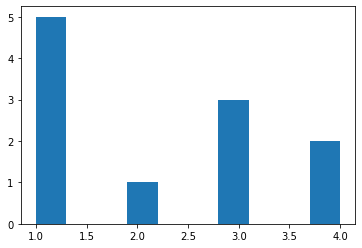

In [ ]:
plot_degree_dist(g)

Local clustering coefficient:

(For nodes of degree <= 2, assume LCCoeff of 0)

In [ ]:
nx.clustering(g, 'F'), nx.clustering(g, 'A'), nx.clustering(g, 'J'), nx.clustering(g, 'K')

(0.3333333333333333, 0.6666666666666666, 0, 1.0)

Global clustering coefficient:

In [ ]:
nx.average_clustering(g)

0.28787878787878785

![open triads and triangles](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%202/media/tri.png?raw=1)

Transitivity: ratio of number of triangles and number of 'open triads' in a network

In [ ]:
nx.transitivity(g)

0.4090909090909091

###### # Example 2

![clustering coeffs and transitivity](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%202/media/transitivity.png?raw=1)

### Distances

Path lenght: Number of edges between two nodes.

Distance: Least number of edges between two nodes.

###### # Example 3

In [ ]:
g = nx.Graph()

In [ ]:
g.add_edges_from(
    [
        ('A', 'K'),
        ('A', 'B'),
        ('B', 'K'),
        ('B', 'C'),
        ('C', 'F'),
        ('C', 'E'),
        ('F', 'E'),
        ('F', 'G'),
        ('D', 'E'),
        ('E', 'H'),
        ('E', 'I'),
        ('I', 'J')
    ]
)

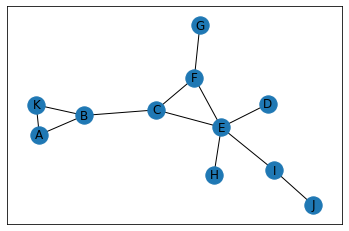

In [ ]:
nx.draw_networkx(g)

In [ ]:
nx.shortest_path(g, 'A', 'H')

['A', 'B', 'C', 'E', 'H']

In [ ]:
nx.shortest_path_length(g, 'A', 'H')

4

- Breadth-first search: Systematic procedure for computing distances from a node to all other nodes in a large network, by 'discovering' nodes in layers. For each leap/edge/iteration/layer, write down the nodes that were  not accounted yet.

![breadth-first search](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%202/media/bfsearch.png?raw=1)

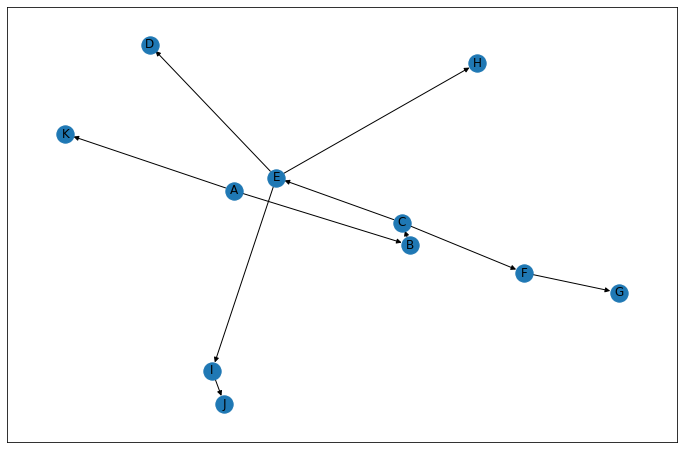

In [ ]:
plt.figure(figsize=(12,8))

t = nx.bfs_tree(g, 'A')
nx.draw_networkx(t)

In [ ]:
t.edges()

OutEdgeView([('A', 'K'), ('A', 'B'), ('B', 'C'), ('C', 'F'), ('C', 'E'), ('F', 'G'), ('E', 'D'), ('E', 'H'), ('E', 'I'), ('I', 'J')])

In [ ]:
nx.shortest_path_length(t, 'A')

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 4,
 'E': 3,
 'F': 3,
 'G': 4,
 'H': 4,
 'I': 4,
 'J': 5,
 'K': 1}

Average distance:

In [ ]:
nx.average_shortest_path_length(g)

2.5272727272727273

Diameter: Maximum possible distance between two nodes

In [ ]:
nx.diameter(g)

5

Eccentricity: Largest distance between a node and all others

In [ ]:
nx.eccentricity(g)

{'A': 5,
 'B': 4,
 'C': 3,
 'D': 4,
 'E': 3,
 'F': 3,
 'G': 4,
 'H': 4,
 'I': 4,
 'J': 5,
 'K': 5}

Radius: Smalles eccentricity of a graph

In [ ]:
nx.radius(g)

3

Periphery: Set of nodes that have eccentricity equals to the diameter

In [ ]:
nx.periphery(g)

['A', 'K', 'J']

Center: Set of nodes which have eccentricity equals to the radius

In [ ]:
nx.center(g)

['C', 'F', 'E']

###### # Example 4 (Undirected graph)

In [ ]:
g = nx.karate_club_graph()
g = nx.convert_node_labels_to_integers(g, first_label=1)

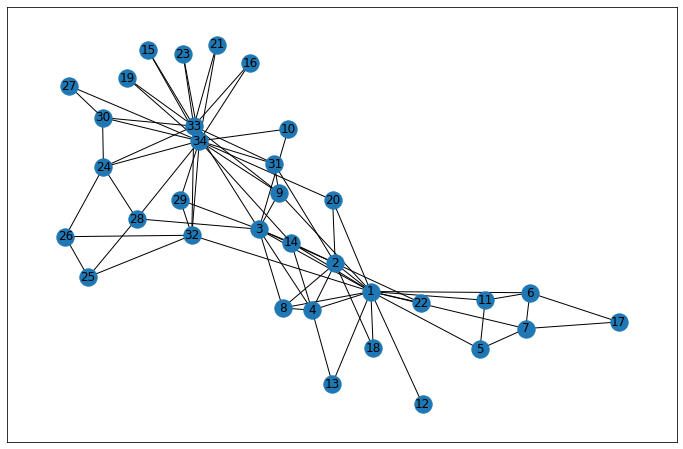

In [ ]:
plt.figure(figsize=(12,8))
nx.draw_networkx(g)

In [ ]:
def info(graph):
    s = 'radius = {0}\ndiameter = {1}\ncenter = {2}\nperiphery = {3}'
    return s.format(nx.radius(graph),
                    nx.diameter(graph),
                    nx.center(graph),
                    nx.periphery(graph))

In [ ]:
print(info(g))

radius = 3
diameter = 5
center = [1, 2, 3, 4, 9, 14, 20, 32]
periphery = [15, 16, 17, 19, 21, 23, 24, 27, 30]


### Connected graphs

An undirected graph is said to be connected when there's a path linking every pair of nodes

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.Graph()
g.add_edges_from(
    [
        ('A', 'B'), ('A', 'E'), ('A', 'C'), ('A', 'N'), ('A', 'G'),
        ('B', 'A'), ('B', 'C'), ('B', 'D'), ('B', 'E'),
        ('C', 'A'), ('C', 'B'), ('C', 'D'), ('C', 'E'),
        ('D', 'C'), ('D', 'B'), ('D', 'E'),
        ('E', 'D'), ('E', 'C'), ('E', 'B'), ('E', 'A'),
        ('F', 'G'), ('F', 'I'), ('F', 'J'),        
        ('G', 'A'), ('G', 'F'), ('G', 'I'), ('G', 'H'),
        ('H', 'G'), ('H', 'I'),
        ('I', 'H'), ('I', 'G'), ('I', 'F'), ('I', 'J'),
        ('J', 'F'), ('J', 'G'), ('J', 'I'), ('J', 'O'),
        ('K', 'L'), ('K', 'M'), ('K', 'O'),
        ('L', 'K'), ('L', 'O'), ('L', 'M'), ('L', 'N'),
        ('M', 'L'), ('M', 'K'),
        ('N', 'A'), ('N', 'L'), ('N', 'O'),
    ]
)

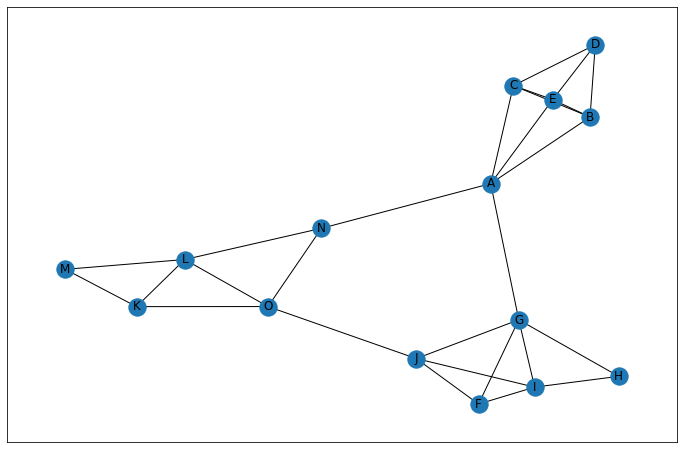

In [26]:
plt.figure(figsize=(12,8))
nx.draw_networkx(g)

In [63]:
sorted(nx.all_simple_paths(g, 'G', 'L'))

[]

In [6]:
nx.is_connected(g)

True

In [7]:
nx.number_connected_components(g)

1

In [13]:
g_un = g.copy() #cloning graph and rename it

In [14]:
#removing edges
g_un.remove_edge('A','G')
g_un.remove_edge('A','N')
g_un.remove_edge('O','J')

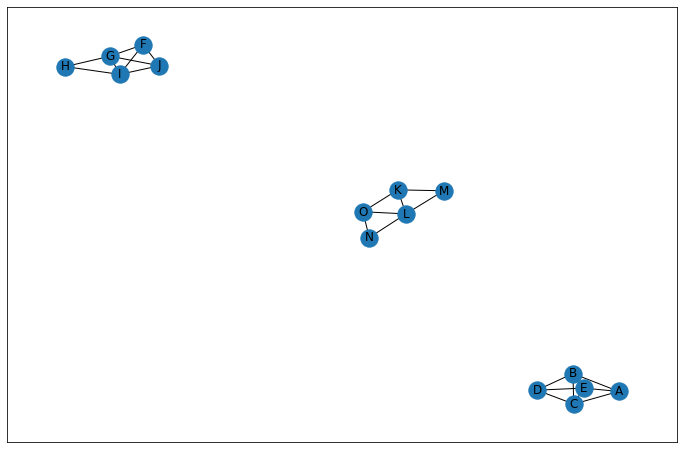

In [16]:
plt.figure(figsize=(12,8))
nx.draw_networkx(g_un)

In [18]:
nx.is_connected(g_un) 

False

Connected component:

    Subset of the graph, on which:
    - Every node in the subset as a path to every other node
    - No other node (from outside) has a path to any node in the subset
    
*(g C G | g é o maior subgrafo conectado possível)*

In [19]:
nx.number_connected_components(g_un)

3

In [20]:
sorted(nx.connected_components(g_un))

[{'A', 'B', 'C', 'D', 'E'},
 {'K', 'L', 'M', 'N', 'O'},
 {'F', 'G', 'H', 'I', 'J'}]

In [21]:
nx.node_connected_component(g_un, 'A')

{'A', 'B', 'C', 'D', 'E'}

In [22]:
nx.node_connected_component(g_un, 'H')

{'F', 'G', 'H', 'I', 'J'}

In [23]:
nx.node_connected_component(g_un, 'M')

{'K', 'L', 'M', 'N', 'O'}

###### # Example 5 (Directed graph)

Strongly connected: If for every pair of nodes (u, v) there's a directed path from u to v and vice-versa

Weakly connected: If replacing all directed edges with undirected edges produces a connected undirected graph

{('A', 'B'): Text(-0.18721119273592632, -0.3672513913017804, '3'),
 ('A', 'C'): Text(-0.12964440586658316, -0.6318210133757054, '2'),
 ('B', 'C'): Text(0.01316662896746526, -0.41420230038824807, '1'),
 ('B', 'D'): Text(0.08621530668033914, -0.07581622924064312, '4'),
 ('B', 'E'): Text(0.013793894482144797, 0.13282090345918737, '3'),
 ('C', 'D'): Text(0.1437820935496823, -0.34038585131456817, '8'),
 ('D', 'F'): Text(0.11585051138443878, 0.4990001099165184, '2'),
 ('E', 'D'): Text(0.14440935906436184, 0.2066373525328673, '4'),
 ('E', 'F'): Text(0.04342909918624444, 0.7076372426163489, '4')}

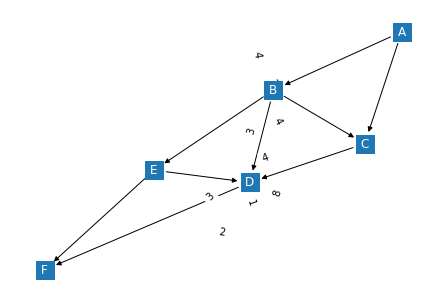

In [29]:
# DiGraph is for directed graph
G = nx.DiGraph()

G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
G.add_node('F')

G.add_edge('A', 'B', weight=3)
G.add_edge('A', 'C', weight=2)
G.add_edge('B', 'C', weight=1)
G.add_edge('B', 'E', weight=3)
G.add_edge('C', 'D', weight=8)
G.add_edge('E', 'F', weight=4)
G.add_edge('D', 'F', weight=2)
G.add_edge('B', 'D', weight=4)
G.add_edge('E', 'D', weight=4)

#show_wgraph()

nx.draw(G,pos=nx.spring_layout(G),font_color = 'white', node_shape = 's', with_labels = True,)
nx.draw_networkx_edge_labels(G,pos=nx.spring_layout(G),edge_labels=nx.get_edge_attributes(G,'weight'))
# nx.is_weakly_connected(G)
# nx.is_strongly_connected(G)

In [31]:
# TODO
nx.is_weakly_connected(G)

True

In [32]:
# TODO
nx.is_strongly_connected(G)

False

### Summary

![summary](https://github.com/arifjamal89/Applied-Social-Network-Analysis/blob/master/Module%202/media/summary.png?raw=1)

In [58]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.Graph()
g.add_edges_from(
    [
        ('A', 'F'), ('A', 'C'), ('A', 'B'), 
        ('B', 'C'), ('B', 'D'), ('B', 'E'),
        ('C', 'F'), ('C', 'E'),
        ('D', 'E'),
        ('E', 'F'), ('E', 'G'), ('E', 'H'),
        #('F', 'G'), ('F', 'I'), ('F', 'J'),        
        ('G', 'H'),('G', 'M'),('G', 'K'),
        ('H', 'M'), ('H', 'N'),
        ('K', 'N'),
        ('M', 'K'),
        ('N', 'H'), ('N', 'K'),
    ]
)

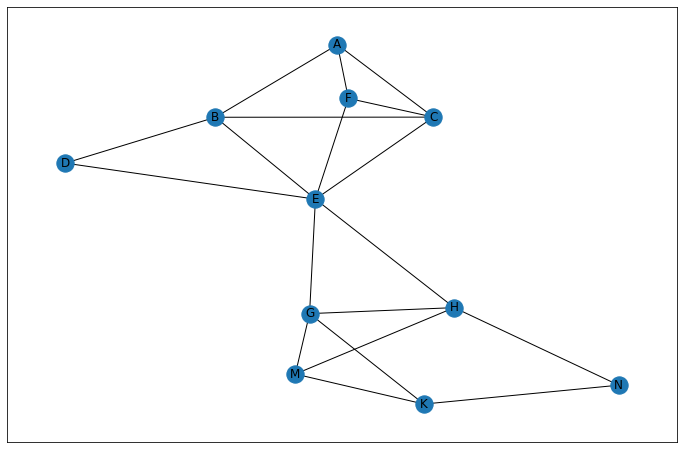

In [59]:
plt.figure(figsize=(12,8))
nx.draw_networkx(g)

In [40]:
nx.node_connectivity(g)

1

In [42]:
nx.minimum_node_cut(g)

{'E'}

In [43]:
nx.edge_connectivity(g)

2

In [44]:
nx.minimum_edge_cut(g)

{('E', 'G'), ('E', 'H')}

In [62]:
sorted(nx.all_simple_paths(g, 'G', 'L'))

[]

### Robustness

The ability to maintain its general structural properties when it faces failures or attacks (e.g.: removal of edges)

i.e.: maintain it's connectivity, like the world wide web, or flight paths

###### # Example 6

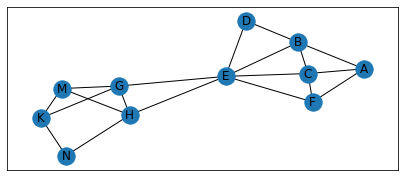

In [61]:
plt.figure(figsize=(7,3))
nx.draw_networkx(g)

In [54]:
nx.node_connectivity(g), nx.minimum_node_cut(g)

(1, {'E'})

In [55]:
nx.edge_connectivity(g), nx.minimum_edge_cut(g)

(2, {('E', 'G'), ('E', 'H')})

Robust networks have a large minimum node and edge cuts

In [64]:
sorted(nx.all_simple_paths(g, 'B', 'H'))

[['B', 'A', 'C', 'E', 'G', 'H'],
 ['B', 'A', 'C', 'E', 'G', 'K', 'M', 'H'],
 ['B', 'A', 'C', 'E', 'G', 'K', 'N', 'H'],
 ['B', 'A', 'C', 'E', 'G', 'M', 'H'],
 ['B', 'A', 'C', 'E', 'G', 'M', 'K', 'N', 'H'],
 ['B', 'A', 'C', 'E', 'H'],
 ['B', 'A', 'C', 'F', 'E', 'G', 'H'],
 ['B', 'A', 'C', 'F', 'E', 'G', 'K', 'M', 'H'],
 ['B', 'A', 'C', 'F', 'E', 'G', 'K', 'N', 'H'],
 ['B', 'A', 'C', 'F', 'E', 'G', 'M', 'H'],
 ['B', 'A', 'C', 'F', 'E', 'G', 'M', 'K', 'N', 'H'],
 ['B', 'A', 'C', 'F', 'E', 'H'],
 ['B', 'A', 'F', 'C', 'E', 'G', 'H'],
 ['B', 'A', 'F', 'C', 'E', 'G', 'K', 'M', 'H'],
 ['B', 'A', 'F', 'C', 'E', 'G', 'K', 'N', 'H'],
 ['B', 'A', 'F', 'C', 'E', 'G', 'M', 'H'],
 ['B', 'A', 'F', 'C', 'E', 'G', 'M', 'K', 'N', 'H'],
 ['B', 'A', 'F', 'C', 'E', 'H'],
 ['B', 'A', 'F', 'E', 'G', 'H'],
 ['B', 'A', 'F', 'E', 'G', 'K', 'M', 'H'],
 ['B', 'A', 'F', 'E', 'G', 'K', 'N', 'H'],
 ['B', 'A', 'F', 'E', 'G', 'M', 'H'],
 ['B', 'A', 'F', 'E', 'G', 'M', 'K', 'N', 'H'],
 ['B', 'A', 'F', 'E', 'H'],
 ['B', '

### Plotting

(based on Coursera's *Visualizing Graphs with NetworkX* notebook)

In [65]:
# Available layouts
layouts = [x for x in nx.__dir__() if x.endswith('_layout')]
layouts

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout']

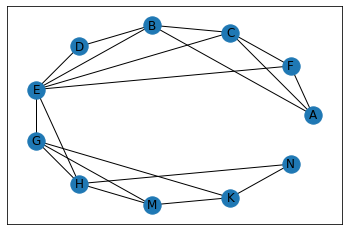

In [66]:
pos = nx.circular_layout(g)
nx.draw_networkx(g, pos)

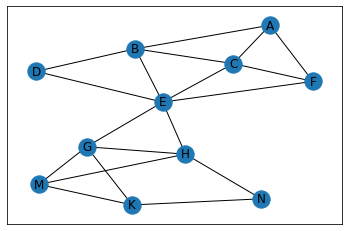

In [67]:
# my favourite
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

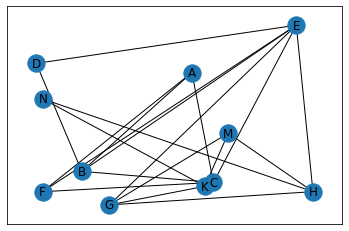

In [70]:
# really random, play it again!
pos = nx.random_layout(g) 
nx.draw_networkx(g, pos)

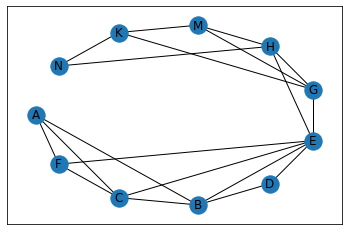

In [71]:
pos = nx.shell_layout(g)
nx.draw_networkx(g, pos)

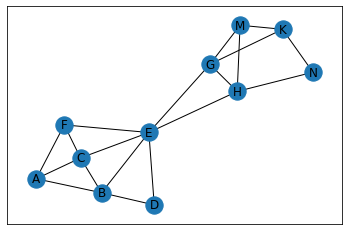

In [72]:
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos)

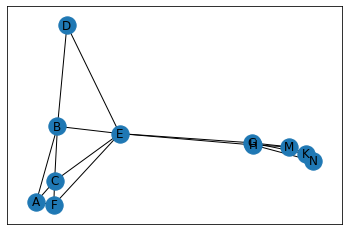

In [73]:
pos = nx.spectral_layout(g)
nx.draw_networkx(g, pos)

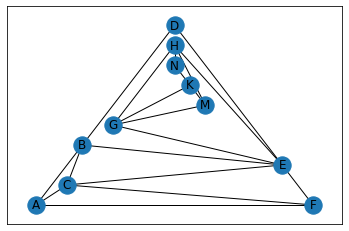

In [74]:
pos = nx.planar_layout(g)
nx.draw_networkx(g, pos)

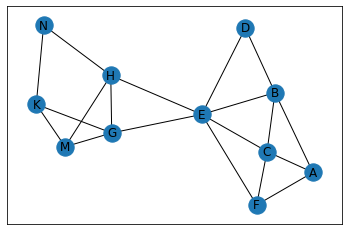

In [75]:
pos = nx.fruchterman_reingold_layout(g)
nx.draw_networkx(g, pos)

EOF